<a href="https://colab.research.google.com/github/kram254/6G-Network-Encryption-Machine-Learning-Model/blob/updates/6G_Network_Encryption_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Data**

## **Mounting google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**NSL_KDD dataset**

In [2]:
import pandas as pd

nsl_kdd_col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

nsl_kdd_train = pd.read_csv('/content/drive/MyDrive/6data/nsl-kdd/NSL_KDD_Train.csv', names=nsl_kdd_col_names)
nsl_kdd_test = pd.read_csv('/content/drive/MyDrive/6data/nsl-kdd/NSL_KDD_Test.csv', names=nsl_kdd_col_names)

nsl_kdd = pd.concat([nsl_kdd_train, nsl_kdd_test], ignore_index=True)

print(nsl_kdd.head(10))


   duration protocol_type     service flag  src_bytes  dst_bytes  land  \
0         0           tcp    ftp_data   SF        491          0     0   
1         0           udp       other   SF        146          0     0   
2         0           tcp     private   S0          0          0     0   
3         0           tcp        http   SF        232       8153     0   
4         0           tcp        http   SF        199        420     0   
5         0           tcp     private  REJ          0          0     0   
6         0           tcp     private   S0          0          0     0   
7         0           tcp     private   S0          0          0     0   
8         0           tcp  remote_job   S0          0          0     0   
9         0           tcp     private   S0          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2       

# **UNSW**

In [3]:
unsw_col_names = ["srcip", "sport", "dstip", "dsport", "proto", "state", "dur", "sbytes", "dbytes", "sttl", "dttl", "sloss", "dloss", "service", "Sload", "Dload", "Spkts",
                  "Dpkts", "swin", "dwin", "stcpb", "dtcpb", "smeansz", "dmeansz", "trans_depth", "res_bdy_len", "Sjit", "Djit", "Stime", "Ltime", "Sintpkt", "Dintpkt", "tcprtt",
                  "synack", "ackdat", "is_sm_ips_ports", "ct_state_ttl", "ct_flw_http_mthd", "is_ftp_login", "ct_ftp_cmd", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm", "ct_src_ltm",
                  "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm", "attack_cat", "Label"]

unsw_frames = [pd.read_csv(f'/content/drive/MyDrive/6data/UNSW/UNSW-NB15_{i}.csv', names=unsw_col_names) for i in range(1, 5)]

unsw_nb15 = pd.concat(unsw_frames, ignore_index=True)

print(unsw_nb15.head(5))


<ipython-input-3-51b8c50f527c>:6: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  unsw_frames = [pd.read_csv(f'/content/drive/MyDrive/6data/UNSW/UNSW-NB15_{i}.csv', names=unsw_col_names) for i in range(1, 5)]
<ipython-input-3-51b8c50f527c>:6: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  unsw_frames = [pd.read_csv(f'/content/drive/MyDrive/6data/UNSW/UNSW-NB15_{i}.csv', names=unsw_col_names) for i in range(1, 5)]


        srcip  sport          dstip dsport proto state       dur  sbytes  \
0  59.166.0.0   1390  149.171.126.6     53   udp   CON  0.001055     132   
1  59.166.0.0  33661  149.171.126.9   1024   udp   CON  0.036133     528   
2  59.166.0.6   1464  149.171.126.7     53   udp   CON  0.001119     146   
3  59.166.0.5   3593  149.171.126.5     53   udp   CON  0.001209     132   
4  59.166.0.3  49664  149.171.126.0     53   udp   CON  0.001169     146   

   dbytes  sttl  ...  ct_ftp_cmd  ct_srv_src  ct_srv_dst ct_dst_ltm  \
0     164    31  ...           0           3           7          1   
1     304    31  ...           0           2           4          2   
2     178    31  ...           0          12           8          1   
3     164    31  ...           0           6           9          1   
4     178    31  ...           0           7           9          1   

   ct_src_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  attack_cat  \
0           3                 1    

# **cic_ids17**

In [4]:
import pandas as pd
import gc


cic_ids17_a_col_names = ["Destination Port", "Flow Duration", "Total Fwd Packets", "Total Backward Packets", "Total Length of Fwd Packets", "Total Length of Bwd Packets",
                         "Fwd Packet Length Max", "Fwd Packet Length Min", "Fwd Packet Length Mean", "Fwd Packet Length Std", "Bwd Packet Length Max", "Bwd Packet Length Min",
                         "Bwd Packet Length Mean", "Bwd Packet Length Std", "Flow Bytes/s", "Flow Packets/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max", "Flow IAT Min",
                         "Fwd IAT Total", "Fwd IAT Mean", "Fwd IAT Std", "Fwd IAT Max", "Fwd IAT Min", "Bwd IAT Total", "Bwd IAT Mean", "Bwd IAT Std", "Bwd IAT Max",
                         "Bwd IAT Min", "Fwd PSH Flags", "Bwd PSH Flags", "Fwd URG Flags", "Bwd URG Flags", "Fwd Header Length", "Bwd Header Length", "Fwd Packets/s",
                         "Bwd Packets/s", "Min Packet Length", "Max Packet Length", "Packet Length Mean", "Packet Length Std", "Packet Length Variance", "FIN Flag Count",
                         "SYN Flag Count", "RST Flag Count", "PSH Flag Count", "ACK Flag Count", "URG Flag Count", "CWE Flag Count", "ECE Flag Count", "Down/Up Ratio",
                         "Average Packet Size", "Avg Fwd Segment Size", "Avg Bwd Segment Size", "Fwd Header Length.1", "Fwd Avg Bytes/Bulk", "Fwd Avg Packets/Bulk",
                         "Fwd Avg Bulk Rate", "Bwd Avg Bytes/Bulk", "Bwd Avg Packets/Bulk", "Bwd Avg Bulk Rate", "Subflow Fwd Packets", "Subflow Fwd Bytes",
                         "Subflow Bwd Packets", "Subflow Bwd Bytes", "Init_Win_bytes_forward", "Init_Win_bytes_backward", "act_data_pkt_fwd", "min_seg_size_forward",
                         "Active Mean", "Active Std", "Active Max", "Active Min", "Idle Mean", "Idle Std", "Idle Max", "Idle Min", "Label"]

cic_ids17_a_files = ["Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv", "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv", "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
                     "Friday-WorkingHours-Morning.pcap_ISCX.csv", "Monday-WorkingHours.pcap_ISCX.csv", "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
                     "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv", "Tuesday-WorkingHours.pcap_ISCX.csv", "Wednesday-workingHours.pcap_ISCX.csv"]

# cic_ids17_a_frames = [pd.read_csv(f'/content/drive/MyDrive/6data/CIC_IDS17/dataA/{file}', names=cic_ids17_a_col_names) for file in cic_ids17_a_files]

def read_and_concat_in_chunks(file_path, chunk_size, concat_df=None):
    for chunk in pd.read_csv(file_path, names=cic_ids17_a_col_names, chunksize=chunk_size):
        concat_df = pd.concat([concat_df, chunk], ignore_index=True) if concat_df is not None else chunk
        gc.collect()  # garbage collector after each chunk to free up memory
    return concat_df

cic_ids17_a = None

for file in cic_ids17_a_files:
    file_path = f'/content/drive/MyDrive/6data/CIC_IDS17/dataA/{file}'
    cic_ids17_a = read_and_concat_in_chunks(file_path, chunk_size=10000, concat_df=cic_ids17_a)

print(cic_ids17_a.head())


<ipython-input-4-6bdc9d8c4c84>:24: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, names=cic_ids17_a_col_names, chunksize=chunk_size):
<ipython-input-4-6bdc9d8c4c84>:24: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, names=cic_ids17_a_col_names, chunksize=chunk_size):
<ipython-input-4-6bdc9d8c4c84>:24: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1

    Destination Port   Flow Duration   Total Fwd Packets  \
0   Destination Port   Flow Duration   Total Fwd Packets   
1              54865               3                   2   
2              55054             109                   1   
3              55055              52                   1   
4              46236              34                   1   

    Total Backward Packets  Total Length of Fwd Packets  \
0   Total Backward Packets  Total Length of Fwd Packets   
1                        0                           12   
2                        1                            6   
3                        1                            6   
4                        1                            6   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0   Total Length of Bwd Packets   Fwd Packet Length Max   
1                             0                       6   
2                             6                       6   
3                             6                 

In [5]:
import os
import gc
import pandas as pd

cic_ids17_b_col_names = ["Flow ID", "Source IP", "Source Port", "Destination IP", "Destination Port", "Protocol", "Timestamp", "Flow Duration", "Total Fwd Packets",
                         "Total Backward Packets", "Total Length of Fwd Packets", "Total Length of Bwd Packets", "Fwd Packet Length Max", "Fwd Packet Length Min",
                         "Fwd Packet Length Mean", "Fwd Packet Length Std", "Bwd Packet Length Max", "Bwd Packet Length Min", "Bwd Packet Length Mean", "Bwd Packet Length Std",
                         "Flow Bytes/s", "Flow Packets/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max", "Flow IAT Min", "Fwd IAT Total", "Fwd IAT Mean", "Fwd IAT Std",
                         "Fwd IAT Max", "Fwd IAT Min", "Bwd IAT Total", "Bwd IAT Mean", "Bwd IAT Std", "Bwd IAT Max", "Bwd IAT Min", "Fwd PSH Flags", "Bwd PSH Flags",
                         "Fwd URG Flags", "Bwd URG Flags", "Fwd Header Length", "Bwd Header Length", "Fwd Packets/s", "Bwd Packets/s", "Min Packet Length", "Max Packet Length",
                         "Packet Length Mean", "Packet Length Std", "Packet Length Variance", "FIN Flag Count", "SYN Flag Count", "RST Flag Count", "PSH Flag Count",
                         "ACK Flag Count", "URG Flag Count", "CWE Flag Count", "ECE Flag Count", "Down/Up Ratio", "Average Packet Size", "Avg Fwd Segment Size",
                         "Avg Bwd Segment Size", "Fwd Header Length.1", "Fwd Avg Bytes/Bulk", "Fwd Avg Packets/Bulk", "Fwd Avg Bulk Rate", "Bwd Avg Bytes/Bulk",
                         "Bwd Avg Packets/Bulk", "Bwd Avg Bulk Rate", "Subflow Fwd Packets", "Subflow Fwd Bytes", "Subflow Bwd Packets", "Subflow Bwd Bytes",
                         "Init_Win_bytes_forward", "Init_Win_bytes_backward", "act_data_pkt_fwd", "min_seg_size_forward", "Active Mean", "Active Std", "Active Max",
                         "Active Min", "Idle Mean", "Idle Std", "Idle Max", "Idle Min", "Label"]

cic_ids17_b_files = ["Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv", "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv", "Friday-WorkingHours-Morning.pcap_ISCX.csv",
                     "Monday-WorkingHours.pcap_ISCX.csv", "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv"
                    #  "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv", "Tuesday-WorkingHours.pcap_ISCX.csv", "Wednesday-workingHours.pcap_ISCX.csv"
                     ]


processed_data_dir = '/content/drive/MyDrive/6data/CIC_IDS17/dataB/processed/'
if not os.path.exists(processed_data_dir):
    os.makedirs(processed_data_dir)

def process_and_save_chunks(file_path, chunk_size, processed_data_dir):
    for i, chunk in enumerate(pd.read_csv(file_path, names=cic_ids17_b_col_names, chunksize=chunk_size, encoding='ISO-8859-1')):
        # Perform preprocessing on the chunk

        chunk.to_csv(f'{processed_data_dir}processed_chunk_{i}.csv', index=False)
        gc.collect()  # garbage collector after each chunk to free up memory

for file in cic_ids17_b_files:
    file_path = f'/content/drive/MyDrive/6data/CIC_IDS17/dataB/{file}'
    process_and_save_chunks(file_path, chunk_size=10000, processed_data_dir=processed_data_dir)

print("All files have been processed and saved in chunks.")


<ipython-input-5-12401deda600>:29: DtypeWarning: Columns (2,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(file_path, names=cic_ids17_b_col_names, chunksize=chunk_size, encoding='ISO-8859-1')):
<ipython-input-5-12401deda600>:29: DtypeWarning: Columns (2,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(file_path, names=cic_ids17_b_col_names, chunksize=chunk_size, encoding='ISO-8859-1')):
<ipython-inp

All files have been processed and saved in chunks.


In [6]:
processed_files = [os.path.join(processed_data_dir, f) for f in os.listdir(processed_data_dir) if f.startswith('processed_chunk_')]

# Ensure there are processed files
if processed_files:
    # Option 1: Read the head of the first file
    first_chunk = pd.read_csv(processed_files[0])
    print("First 10 rows of the first processed chunk:")
    print(first_chunk.head(10))

    # Option 2: If you want to read the first 10 rows from each file and print them
    # for file in processed_files:
    #     chunk = pd.read_csv(file)
    #     print(f"First 10 rows of {os.path.basename(file)}:")
    #     print(chunk.head(10))
    #     print("\n-------------------------------------------------------\n")

else:
    print("No processed chunk files found in the specified directory.")

First 10 rows of the first processed chunk:
                                    Flow ID      Source IP  Source Port  \
0     192.168.10.1-192.168.10.3-53-60107-17   192.168.10.3        60107   
1     192.168.10.1-192.168.10.3-53-62039-17   192.168.10.3        62039   
2       192.168.10.8-23.50.75.27-57221-80-6   192.168.10.8        57221   
3     192.168.10.3-192.168.10.8-53-54111-17   192.168.10.8        54111   
4     192.168.10.8-80.82.201.94-57346-443-6   192.168.10.8        57346   
5     192.168.10.8-80.82.201.94-57346-443-6   192.168.10.8        57346   
6     192.168.10.1-192.168.10.3-53-60918-17   192.168.10.3        60918   
7     192.168.10.3-192.168.10.8-53-58063-17   192.168.10.8        58063   
8  173.194.66.108-192.168.10.12-465-36592-6  192.168.10.12        36592   
9     192.168.10.1-192.168.10.3-53-61958-17   192.168.10.3        61958   

   Destination IP  Destination Port  Protocol            Timestamp  \
0    192.168.10.1                53        17  03/07/2017 03

# **Describe() and Info() the data**

In [7]:
print("NSL-KDD Dataset:")
print(nsl_kdd.info())
print(nsl_kdd.describe())

print("\nUNSW-NB15 Dataset:")
print(unsw_nb15.info())
print(unsw_nb15.describe())

processed_data_dir = '/content/drive/MyDrive/6data/CIC_IDS17/dataB/processed/'

processed_files = [os.path.join(processed_data_dir, f) for f in os.listdir(processed_data_dir) if f.startswith('processed_chunk_')]

if processed_files:
    first_chunk = pd.read_csv(processed_files[0])

    print("Info of the first processed chunk:")
    first_chunk.info()

    print("\nDescription of the first processed chunk:")
    print(first_chunk.describe())

else:
    print("No processed chunk files found in the specified directory.")



NSL-KDD Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-n

# **Heatmap of Correlation Matrix**

In [8]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 8))
# correlation_matrix = nsl_kdd.corr()
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
# plt.title('NSL-KDD Correlation Matrix')
# plt.show()


# **Boxplots for Feature Distribution Across Classes**

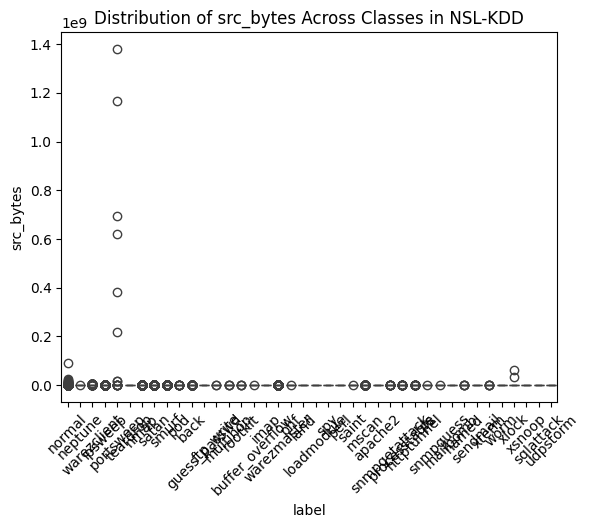

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='label', y='src_bytes', data=nsl_kdd)
plt.title('Distribution of src_bytes Across Classes in NSL-KDD')
plt.xticks(rotation=45)
plt.show()


# **Feature Importance from Random Forest**

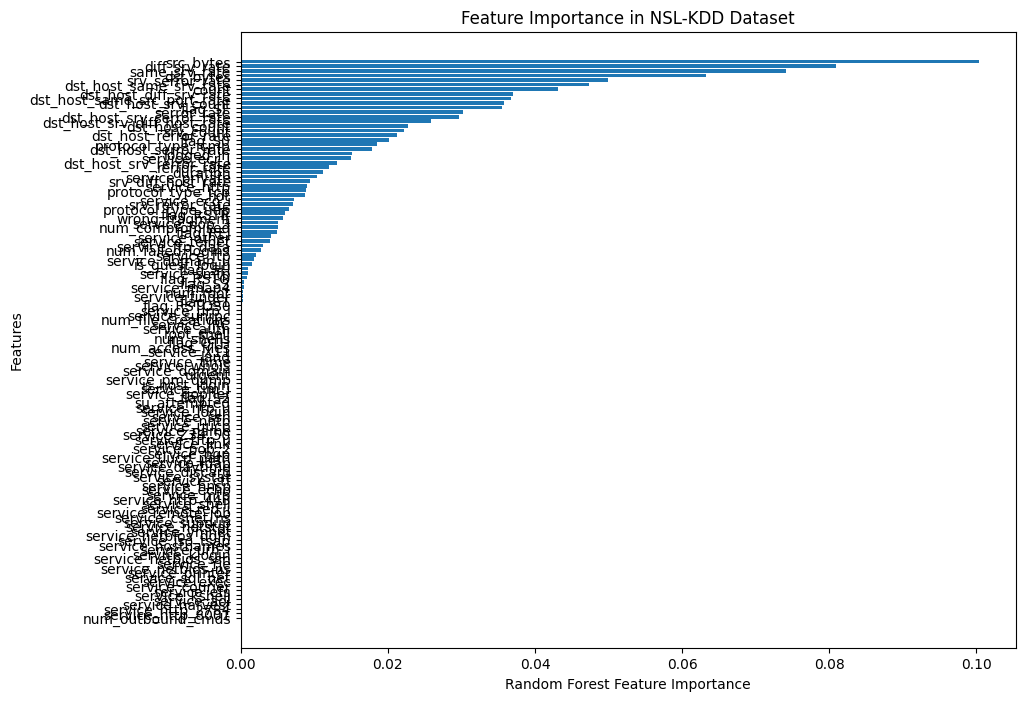

In [10]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

nsl_kdd_col_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
    "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
    "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"
]

X = nsl_kdd.drop('label', axis=1)
y = nsl_kdd['label']

X = pd.get_dummies(X)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)

plt.figure(figsize=(10, 8))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in NSL-KDD Dataset")
plt.show()


# **Milestone 2**

# **Training**

#### Define model architectures

In [11]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Define the model architectures
def build_dolev_yao_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(2, activation='softmax')  # Assuming binary classification
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_canetti_krawczyk_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(2, activation='softmax')  # Assuming binary classification
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, BatchNormalization
# from keras.callbacks import EarlyStopping
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# from keras.utils import to_categorical
# import gc
# from google.colab import drive
# import keras_tuner as kt

# def print_metrics(y_true, y_pred):
#     accuracy = accuracy_score(y_true, y_pred)
#     precision = precision_score(y_true, y_pred, average='weighted')
#     recall = recall_score(y_true, y_pred, average='weighted')
#     f1 = f1_score(y_true, y_pred, average='weighted')
#     confusion_mat = confusion_matrix(y_true, y_pred)

#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall: {recall:.4f}")
#     print(f"F1-Score: {f1:.4f}")
#     print("Confusion Matrix:")
#     print(confusion_mat)
#     print()

# # Function to process data from the provided dataset
# def process_data(dataset, feature_cols, label_col):
#     X = pd.get_dummies(dataset[feature_cols])
#     y = dataset[label_col]

#     # Encode string labels into integers
#     label_encoder = LabelEncoder()
#     y = label_encoder.fit_transform(y)

#     num_classes = len(label_encoder.classes_)

#     # Convert to appropriate data types
#     X = X.astype('float32')
#     y = to_categorical(y, num_classes=num_classes).astype('float32')

#     return X, y, num_classes

# # Train and fine-tune on each dataset
# datasets = [nsl_kdd, unsw_nb15]  # Assuming nsl_kdd and unsw_nb15 are defined somewhere
# label_cols = ['label', 'Label']
# unsw_col_names = ["srcip", "sport", "dstip", "dsport", "proto", "state", "dur", "sbytes", "dbytes", "sttl", "dttl", "sloss", "dloss", "service", "Sload", "Dload", "Spkts",
#                   "Dpkts", "swin", "dwin", "stcpb", "dtcpb", "smeansz", "dmeansz", "trans_depth", "res_bdy_len", "Sjit", "Djit", "Stime", "Ltime", "Sintpkt", "Dintpkt", "tcprtt",
#                   "synack", "ackdat", "is_sm_ips_ports", "ct_state_ttl", "ct_flw_http_mthd", "is_ftp_login", "ct_ftp_cmd", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm", "ct_src_ltm",
#                   "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm", "attack_cat"]
# nsl_kdd_col_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
#                      "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
#                      "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
#                      "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
#                      "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate"]
# feature_cols = [nsl_kdd_col_names, unsw_col_names[:-1]]  # Exclude the 'Label' column

# for dataset, label_col, feature_cols in zip(datasets, label_cols, feature_cols):
#     print(f"Training on dataset: {label_col}")

#     X, y, num_classes = process_data(dataset, feature_cols, label_col)

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#     X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

#     # Define the model architecture
#     def build_model(num_classes, hp):
#         model = Sequential([
#             Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#             BatchNormalization(),
#             Dropout(0.2),
#             Dense(64, activation='relu'),
#             BatchNormalization(),
#             Dropout(0.2),
#             Dense(num_classes, activation='softmax')
#         ])
#         model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#         return model



#         model = build_model(num_classes)

#         early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#         model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=120, batch_size=64, callbacks=[early_stopping])

#         # Evaluate on test set
#         y_pred = np.argmax(model.predict(X_test), axis=1)
#         y_true = np.argmax(y_test, axis=1)

#         print(f"Metrics for {label_col} dataset:")
#         print_metrics(y_true, y_pred)

#         # Free up memory
#         del X, y, X_train, y_train, X_val, y_val, X_test, y_test, model
#         gc.collect()


























    # # Define the hyperparameter search space
    # tuner = kt.RandomSearch(
    #     lambda hp: build_model(num_classes, hp),
    #     objective='val_loss',
    #     max_trials=10,
    #     directory='my_tuning_directory',
    #     project_name='my_tuning_project'
    # )

    # # Perform hyperparameter tuning
    # tuner.search_space = {
    #     'batch_size': kt.IntHyperParameter(32, 128, step=32),
    #     'epochs': kt.IntHyperParameter(10, 30, step=5),
    #     'learning_rate': kt.RealHyperParameter(0.001, 0.1, step=0.01)
    # }

    # tuner.run_trial()

    # # Evaluate on test set
    # best_model = tuner.get_best_models(num_models=1)[0]
    # y_pred = np.argmax(best_model.predict(X_test), axis=1)
    # y_true = np.argmax(y_test, axis=1)

    # print(f"Metrics for {label_col} dataset:")
    # print_metrics(y_true, y_pred)

    # # Free up memory
    # del X, y, X_train, y_train, X_val, y_val, X_test, y_test
    # gc.collect()





































































# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# from keras.callbacks import EarlyStopping
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# from keras.utils import to_categorical
# import gc
# from google.colab import drive

# def print_metrics(y_true, y_pred):
#     accuracy = accuracy_score(y_true, y_pred)
#     precision = precision_score(y_true, y_pred, average='weighted')
#     recall = recall_score(y_true, y_pred, average='weighted')
#     f1 = f1_score(y_true, y_pred, average='weighted')
#     confusion_mat = confusion_matrix(y_true, y_pred)

#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall: {recall:.4f}")
#     print(f"F1-Score: {f1:.4f}")
#     print("Confusion Matrix:")
#     print(confusion_mat)
#     print()


# # Function to process data from the provided dataset
# def process_data(dataset, feature_cols, label_col):
#     X = pd.get_dummies(dataset[feature_cols])
#     y = dataset[label_col]

#     # Encode string labels into integers
#     label_encoder = LabelEncoder()
#     y = label_encoder.fit_transform(y)

#     num_classes = len(label_encoder.classes_)

#     # Convert to appropriate data types
#     X = X.astype('float32')
#     y = to_categorical(y, num_classes=num_classes).astype('float32')

#     return X, y, num_classes


# # Train and fine-tune on each dataset
# datasets = [nsl_kdd, unsw_nb15]  # Assuming nsl_kdd and unsw_nb15 are defined somewhere
# label_cols = ['label', 'Label']
# unsw_col_names = ["srcip", "sport", "dstip", "dsport", "proto", "state", "dur", "sbytes", "dbytes", "sttl", "dttl", "sloss", "dloss", "service", "Sload", "Dload", "Spkts",
#                   "Dpkts", "swin", "dwin", "stcpb", "dtcpb", "smeansz", "dmeansz", "trans_depth", "res_bdy_len", "Sjit", "Djit", "Stime", "Ltime", "Sintpkt", "Dintpkt", "tcprtt",
#                   "synack", "ackdat", "is_sm_ips_ports", "ct_state_ttl", "ct_flw_http_mthd", "is_ftp_login", "ct_ftp_cmd", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm", "ct_src_ltm",
#                   "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm", "attack_cat"]
# nsl_kdd_col_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
#                      "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
#                      "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
#                      "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
#                      "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate"]












# from sklearn.preprocessing import LabelEncoder, StandardScaler

# feature_cols = [nsl_kdd_col_names, unsw_col_names[:-1]]


# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)









# import keras_tuner as kt
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, BatchNormalization

# num_classes = len(label_encoder.classes_)

# # Define the model architecture
# def build_model(hp):
#     # Define the model architecture
#     model = Sequential([
#         Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#         BatchNormalization(),
#         Dropout(0.2),
#         Dense(64, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.2),
#         Dense(num_classes, activation='softmax')
#     ])
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

# # Define the hyperparameter search space
# tuner = kt.Hyperband(
#     build_model,
#     objective='val_loss',
#     max_epochs=10,
#     directory='my_tuning_directory',
#     project_name='my_tuning_project'
# )

# # Perform hyperparameter tuning
# tuner.search_space = {
#     'batch_size': kt.IntHyperband(32, 128, 2),
#     'epochs': kt.IntHyperband(10, 30, 2),
#     'learning_rate': kt.RealHyperband(0.001, 0.1, 2)
# }

# tuner.run_trial()



















# Define the model architecture
# def build_model(input_shape, num_classes):
#     model = Sequential([
#         Dense(128, activation='relu', input_shape=input_shape),
#         Dropout(0.2),
#         Dense(64, activation='relu'),
#         Dropout(0.2),
#         Dense(num_classes, activation='softmax')  # Assuming multi-class classification
#     ])
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#     return model



# # Mount Google Drive
# drive.mount('/content/drive')










    # model = build_model(input_shape, num_classes)

    # early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, batch_size=64, callbacks=[early_stopping])

    # # Save the trained model to Google Drive
    # model_path = f'/content/drive/MyDrive/trained_6G_model1_{label_col}.h5'
    # model.save(model_path)
    # print(f"Trained model saved to {model_path}")

    # # Evaluate on test set
    # y_pred = np.argmax(model.predict(X_test), axis=1)
    # y_true = np.argmax(y_test, axis=1)

    # print(f"Metrics for {label_col} dataset:")
    # print_metrics(y_true, y_pred)

    # # Free up memory
    # del X, y, X_train, y_train, X_val, y_val, X_test, y_test, model
    # gc.collect()



























# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, BatchNormalization
# from keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from keras.utils import to_categorical
# import gc
# from google.colab import drive


# def print_metrics(y_true, y_pred):
#     accuracy = accuracy_score(y_true, y_pred)
#     precision = precision_score(y_true, y_pred, average='weighted')
#     recall = recall_score(y_true, y_pred, average='weighted')
#     f1 = f1_score(y_true, y_pred, average='weighted')
#     confusion_mat = confusion_matrix(y_true, y_pred)

#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall: {recall:.4f}")
#     print(f"F1-Score: {f1:.4f}")
#     print("Confusion Matrix:")
#     print(confusion_mat)
#     print()


# def build_model(input_shape, num_classes):
#     model = Sequential([
#         Dense(128, activation='relu', input_shape=input_shape),
#         BatchNormalization(),
#         Dropout(0.2),
#         Dense(64, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.2),
#         Dense(num_classes, activation='softmax')
#     ])
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

# def process_data(dataset, feature_cols, label_col):
#     X = pd.get_dummies(dataset[feature_cols])
#     y = dataset[label_col]

#     label_encoder = LabelEncoder()
#     y = label_encoder.fit_transform(y)

#     num_classes = len(label_encoder.classes_)

#     X = X.astype('float32')
#     y = to_categorical(y, num_classes=num_classes).astype('float32')

#     X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
#     X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#     input_shape = (X_train.shape[1],)

#     return X_train, y_train, X_val, y_val, X_test, y_test, input_shape, num_classes


# drive.mount('/content/drive')

# # Train and fine-tune on each dataset
# datasets = [nsl_kdd, unsw_nb15]
# label_cols = ['label', 'Label']
# unsw_col_names = ["srcip", "sport", "dstip", "dsport", "proto", "state", "dur", "sbytes", "dbytes", "sttl", "dttl", "sloss", "dloss", "service", "Sload", "Dload", "Spkts",
#                   "Dpkts", "swin", "dwin", "stcpb", "dtcpb", "smeansz", "dmeansz", "trans_depth", "res_bdy_len", "Sjit", "Djit", "Stime", "Ltime", "Sintpkt", "Dintpkt", "tcprtt",
#                   "synack", "ackdat", "is_sm_ips_ports", "ct_state_ttl", "ct_flw_http_mthd", "is_ftp_login", "ct_ftp_cmd", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm", "ct_src_ltm",
#                   "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm", "attack_cat"]
# nsl_kdd_col_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
#                      "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
#                      "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
#                      "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
#                      "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate"]
# feature_cols = [nsl_kdd_col_names, unsw_col_names[:-1]]  # Exclude the 'Label' column

# for dataset, label_col, feature_cols in zip(datasets, label_cols, feature_cols):
#     print(f"Training on dataset: {label_col}")

#     X_train, y_train, X_val, y_val, X_test, y_test, input_shape, num_classes = process_data(dataset, feature_cols, label_col)


#     scaler = StandardScaler()
#     X_train = scaler.fit_transform(X_train)
#     X_val = scaler.transform(X_val)
#     X_test = scaler.transform(X_test)

#     model = build_model(input_shape, num_classes)

#     early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
#     reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, min_lr=0.001)

#     model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=120, batch_size=64, callbacks=[early_stopping, reduce_lr])

#     model_path = f'/content/drive/MyDrive/trained_model2_{label_col}.h5'
#     model.save(model_path)
#     print(f"Trained model saved to {model_path}")

#     y_pred = np.argmax(model.predict(X_test), axis=1)
#     y_true = np.argmax(y_test, axis=1)

#     print(f"Metrics for {label_col} dataset:")
#     print_metrics(y_true, y_pred)

#     del X_train, y_train, X_val, y_val, X_test, y_test, model
#     gc.collect()

#     import psutil
#     process = psutil.Process()
#     if process.memory_info().rss > 1000000000:  # 1 GB
#         print("Runtime is still running, exiting...")
#         exit(0)









In [ ]:












# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, BatchNormalization
# from keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from keras.utils import to_categorical
# import gc
# from google.colab import drive

# def print_metrics(y_true, y_pred):
#     accuracy = accuracy_score(y_true, y_pred)
#     precision = precision_score(y_true, y_pred, average='weighted')
#     recall = recall_score(y_true, y_pred, average='weighted')
#     f1 = f1_score(y_true, y_pred, average='weighted')
#     confusion_mat = confusion_matrix(y_true, y_pred)

#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall: {recall:.4f}")
#     print(f"F1-Score: {f1:.4f}")
#     print("Confusion Matrix:")
#     print(confusion_mat)
#     print()

# def build_model(input_shape, num_classes):
#     model = Sequential([
#         Dense(128, activation='relu', input_shape=input_shape),
#         BatchNormalization(),
#         Dropout(0.2),
#         Dense(64, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.2),
#         Dense(num_classes, activation='softmax')
#     ])
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

# def process_data(dataset, feature_cols, label_col):
#     X = pd.get_dummies(dataset[feature_cols])
#     y = dataset[label_col]

#     y, unique_labels = pd.factorize(y)

#     num_classes = len(unique_labels)

#     X = X.astype('float32')
#     y = to_categorical(y, num_classes=num_classes).astype('float32')

#     X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
#     X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#     input_shape = (X_train.shape[1],)

#     return X_train, y_train, X_val, y_val, X_test, y_test, input_shape, num_classes

# drive.mount('/content/drive')

# # Train and fine-tune on the dataset
# data_dir = '/content/drive/MyDrive/6data/CIC_IDS17/dataB/processed/'
# processed_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.startswith('processed_chunk_')]

# feature_cols = ["Flow ID", "Source IP", "Source Port", "Destination IP", "Destination Port", "Protocol", "Timestamp", "Flow Duration", "Total Fwd Packets", "Total Backward Packets", "Total Length of Fwd Packets", "Total Length of Bwd Packets", "Fwd Packet Length Max", "Fwd Packet Length Min", "Fwd Packet Length Mean", "Fwd Packet Length Std", "Bwd Packet Length Max", "Bwd Packet Length Min", "Bwd Packet Length Mean", "Bwd Packet Length Std", "Flow Bytes/s", "Flow Packets/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max", "Flow IAT Min", "Fwd IAT Total", "Fwd IAT Mean", "Fwd IAT Std", "Fwd IAT Max", "Fwd IAT Min", "Bwd IAT Total", "Bwd IAT Mean", "Bwd IAT Std", "Bwd IAT Max", "Bwd IAT Min", "Fwd PSH Flags", "Bwd PSH Flags", "Fwd URG Flags", "Bwd URG Flags", "Fwd Header Length", "Bwd Header Length", "Fwd Packets/s", "Bwd Packets/s", "Min Packet Length", "Max Packet Length", "Packet Length Mean", "Packet Length Std", "Packet Length Variance", "FIN Flag Count", "SYN Flag Count", "RST Flag Count", "PSH Flag Count", "ACK Flag Count", "URG Flag Count", "CWE Flag Count", "ECE Flag Count", "Down/Up Ratio", "Average Packet Size", "Avg Fwd Segment Size", "Avg Bwd Segment Size", "Fwd Header Length", "Fwd Avg Bytes/Bulk", "Fwd Avg Packets/Bulk", "Fwd Avg Bulk Rate", "Bwd Avg Bytes/Bulk", "Bwd Avg Packets/Bulk", "Bwd Avg Bulk Rate", "Subflow Fwd Packets", "Subflow Fwd Bytes", "Subflow Bwd Packets", "Subflow Bwd Bytes", "Init_Win_bytes_forward", "Init_Win_bytes_backward", "act_data_pkt_fwd", "min_seg_size_forward", "Active Mean", "Active Std", "Active Max", "Active Min", "Idle Mean", "Idle Std", "Idle Max", "Idle Min"]
# label_col = 'Label'

# dtypes = {
#     "Flow ID": str,
#     "Source IP": str,
#     "Destination IP": str,
#     "Protocol": 'category',
#     "Flow Duration": float,
#     "Total Fwd Packets": int,
#     "Total Backward Packets": int,
#     "Total Length of Fwd Packets": int,
#     "Total Length of Bwd Packets": int,
#     "Fwd Packet Length Max": float,
#     "Fwd Packet Length Min": float,
#     "Fwd Packet Length Mean": float,
#     "Fwd Packet Length Std": float,
#     "Bwd Packet Length Max": float,
#     "Bwd Packet Length Min": float,
#     "Bwd Packet Length Mean": float,
#     "Bwd Packet Length Std": float,
#     "Flow Bytes/s": float,
#     "Flow Packets/s": float,
#     "Flow IAT Mean": float,
#     "Flow IAT Std": float,
#     "Flow IAT Max": float,
#     "Flow IAT Min": float,
#     "Fwd IAT Total": float,
#     "Fwd IAT Mean": float,
#     "Fwd IAT Std": float,
#     "Fwd IAT Max": float,
#     "Fwd IAT Min": float,
#     "Bwd IAT Total": float,
#     "Bwd IAT Mean": float,
#     "Bwd IAT Std": float,
#     "Bwd IAT Max": float,
#     "Bwd IAT Min": float,
#     "Fwd PSH Flags": int,
#     "Bwd PSH Flags": int,
#     "Fwd URG Flags": int,
#     "Bwd URG Flags": int,
#     "Fwd Header Length": int,
#     "Bwd Header Length": int,
#     "Fwd Packets/s": float,
#     "Bwd Packets/s": float,
#     "Min Packet Length": float,
#     "Max Packet Length": float,
#     "Packet Length Mean": float,
#     "Packet Length Std": float,
#     "Packet Length Variance": float,
#     "FIN Flag Count": int,
#     "SYN Flag Count": int,
#     "RST Flag Count": int,
#     "PSH Flag Count": int,
#     "ACK Flag Count": int,
#     "URG Flag Count": int,
#     "CWE Flag Count": int,
#     "ECE Flag Count": int,
#     "Down/Up Ratio": float,
#     "Average Packet Size": float,
#     "Avg Fwd Segment Size": float,
#     "Avg Bwd Segment Size": float,
#     "Fwd Header Length": int,
#     "Fwd Avg Bytes/Bulk": float,
#     "Fwd Avg Packets/Bulk": float,
#     "Fwd Avg Bulk Rate": float,
#     "Bwd Avg Bytes/Bulk": float,
#     "Bwd Avg Packets/Bulk": float,
#     "Bwd Avg Bulk Rate": float,
#     "Subflow Fwd Packets": int,
#     "Subflow Fwd Bytes": int,
#     "Subflow Bwd Packets": int,
#     "Subflow Bwd Bytes": int,
#     "Init_Win_bytes_forward": int,
#     "Init_Win_bytes_backward": int,
#     "act_data_pkt_fwd": int,
#     "min_seg_size_forward": int,
#     "Active Mean": float,
#     "Active Std": float,
#     "Active Max": float,
#     "Active Min": float,
#     "Idle Mean": float,
#     "Idle Std": float,
#     "Idle Max": float,
#     "Idle Min": float
# }

# print("Training on the dataset...")

# X_train_batches = []
# y_train_batches = []
# X_val_batches = []
# y_val_batches = []
# X_test_batches = []
# y_test_batches = []

# for file_path in processed_files:
#     data = pd.read_csv(file_path, dtype=dtypes)
#     data['Flow Duration'] = data['Flow Duration'].replace(' ', np.nan).astype(float)  # Handle string values in "Flow Duration"
#     X = data[feature_cols]
#     y = data[label_col]

#     X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
#     X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#     X_train_batches.append(X_train)
#     y_train_batches.append(y_train)
#     X_val_batches.append(X_val)
#     y_val_batches.append(y_val)
#     X_test_batches.append(X_test)
#     y_test_batches.append(y_test)

# X_train = pd.concat(X_train_batches, ignore_index=True)
# y_train = pd.concat(y_train_batches, ignore_index=True)
# X_val = pd.concat(X_val_batches, ignore_index=True)
# y_val = pd.concat(y_val_batches, ignore_index=True)
# X_test = pd.concat(X_test_batches, ignore_index=True)
# y_test = pd.concat(y_test_batches, ignore_index=True)

# y_train, unique_labels = pd.factorize(y_train)
# y_val = pd.factorize(y_val, sort=True)[0]
# y_test = pd.factorize(y_test, sort=True)[0]

# num_classes = len(unique_labels)

# X_train = X_train.astype('float32')
# X_val = X_val.astype('float32')
# X_test = X_test.astype('float32')
# y_train = to_categorical(y_train, num_classes=num_classes).astype('float32')
# y_val = to_categorical(y_val, num_classes=num_classes).astype('float32')
# y_test = to_categorical(y_test, num_classes=num_classes).astype('float32')

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)

# input_shape = (X_train.shape[1],)

# model = build_model(input_shape, num_classes)

# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, min_lr=0.001)

# model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=120, batch_size=64, callbacks=[early_stopping, reduce_lr])

# model_path = '/content/drive/MyDrive/trained_6G_model.h5'
# model.save(model_path)
# print(f"Trained model saved to {model_path}")

# y_pred = np.argmax(model.predict(X_test), axis=1)
# y_true = np.argmax(y_test, axis=1)

# print("Metrics for the dataset:")
# print_metrics(y_true, y_pred)

# del X_train, y_train, X_val, y_val, X_test, y_test, model
# gc.collect()

# import psutil
# process = psutil.Process()
# if process.memory_info().rss > 1000000000:  # 1 GB
#     print("Runtime is still running, exiting...")
#     exit(0)

In [ ]:
import os
import gc
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
from google.colab import drive
import pickle

def print_metrics(y_true, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    confusion_mat = confusion_matrix(y_true, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_mat)
    print()

def build_model(input_shape, num_classes):
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.2),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

drive.mount('/content/drive')

# Train and fine-tune on the dataset
data_dir = '/content/drive/MyDrive/6data/CIC_IDS17/dataB/processed/'
processed_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.startswith('processed_chunk_')]

# Placeholder for feature_cols
feature_cols = ["Flow ID", "Source IP", "Destination IP", "Timestamp", "Source Port", "Destination Port", "Protocol", "Flow Duration", "Total Fwd Packets", "Total Backward Packets", "Total Length of Fwd Packets", "Total Length of Bwd Packets", "Fwd Packet Length Max", "Fwd Packet Length Min", "Fwd Packet Length Mean", "Fwd Packet Length Std", "Bwd Packet Length Max", "Bwd Packet Length Min", "Bwd Packet Length Mean", "Bwd Packet Length Std", "Flow Bytes/s", "Flow Packets/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max", "Flow IAT Min", "Fwd IAT Total", "Fwd IAT Mean", "Fwd IAT Std", "Fwd IAT Max", "Fwd IAT Min", "Bwd IAT Total", "Bwd IAT Mean", "Bwd IAT Std", "Bwd IAT Max", "Bwd IAT Min", "Fwd PSH Flags", "Bwd PSH Flags", "Fwd URG Flags", "Bwd URG Flags", "Fwd Header Length", "Bwd Header Length", "Fwd Packets/s", "Bwd Packets/s", "Min Packet Length", "Max Packet Length", "Packet Length Mean", "Packet Length Std", "Packet Length Variance", "FIN Flag Count", "SYN Flag Count", "RST Flag Count", "PSH Flag Count", "ACK Flag Count", "URG Flag Count", "CWE Flag Count", "ECE Flag Count", "Down/Up Ratio", "Average Packet Size", "Avg Fwd Segment Size", "Avg Bwd Segment Size", "Fwd Avg Bytes/Bulk", "Fwd Avg Packets/Bulk", "Fwd Avg Bulk Rate", "Bwd Avg Bytes/Bulk", "Bwd Avg Packets/Bulk", "Bwd Avg Bulk Rate", "Subflow Fwd Packets", "Subflow Fwd Bytes", "Subflow Bwd Packets", "Subflow Bwd Bytes", "Init_Win_bytes_forward", "Init_Win_bytes_backward", "act_data_pkt_fwd", "min_seg_size_forward", "Active Mean", "Active Std", "Active Max", "Active Min", "Idle Mean", "Idle Std", "Idle Max", "Idle Min"]
label_col = 'Label'


dtypes = {
    "Flow ID": str,
    "Source IP": str,
    "Destination IP": str,
    "Protocol": 'category',
    "Flow Duration": object,
    "Total Fwd Packets": object,
    "Total Backward Packets": object,
    "Total Length of Fwd Packets": object,
    "Total Length of Bwd Packets": object,
    "Fwd Packet Length Max": object,
    "Fwd Packet Length Min": object,
    "Fwd Packet Length Mean": object,
    "Fwd Packet Length Std": object,
    "Bwd Packet Length Max": object,
    "Bwd Packet Length Min": object,
    "Bwd Packet Length Mean": object,
    "Bwd Packet Length Std": object,
    "Flow Bytes/s": object,
    "Flow Packets/s": object,
    "Flow IAT Mean": object,
    "Flow IAT Std": object,
    "Flow IAT Max": object,
    "Flow IAT Min": object,
    "Fwd IAT Total": object,
    "Fwd IAT Mean": object,
    "Fwd IAT Std": object,
    "Fwd IAT Max": object,
    "Fwd IAT Min": object,
    "Bwd IAT Total": object,
    "Bwd IAT Mean": object,
    "Bwd IAT Std": object,
    "Bwd IAT Max": object,
    "Bwd IAT Min": object,
    "Fwd PSH Flags": object,
    "Bwd PSH Flags": object,
    "Fwd URG Flags": object,
    "Bwd URG Flags": object,
    "Fwd Header Length": object,
    "Bwd Header Length": object,
    "Fwd Packets/s": object,
    "Bwd Packets/s": object,
    "Min Packet Length": object,
    "Max Packet Length": object,
    "Packet Length Mean": object,
    "Packet Length Std": object,
    "Packet Length Variance": object,
    "FIN Flag Count": object,
    "SYN Flag Count": object,
    "RST Flag Count": object,
    "PSH Flag Count": object,
    "ACK Flag Count": object,
    "URG Flag Count": object,
    "CWE Flag Count": object,
    "ECE Flag Count": object,
    "Down/Up Ratio": object,
    "Average Packet Size": object,
    "Avg Fwd Segment Size": object,
    "Avg Bwd Segment Size": object,
    "Fwd Avg Bytes/Bulk": object,
    "Fwd Avg Packets/Bulk": object,
    "Fwd Avg Bulk Rate": object,
    "Bwd Avg Bytes/Bulk": object,
    "Bwd Avg Packets/Bulk": object,
    "Bwd Avg Bulk Rate": object,
    "Subflow Fwd Packets": object,
    "Subflow Fwd Bytes": object,
    "Subflow Bwd Packets": object,
    "Subflow Bwd Bytes": object,
    "Init_Win_bytes_forward": object,
    "Init_Win_bytes_backward": object,
    "act_data_pkt_fwd": object,
    "min_seg_size_forward": object,
    "Active Mean": object,
    "Active Std": object,
    "Active Max": object,
    "Active Min": object,
    "Idle Mean": object,
    "Idle Std": object,
    "Idle Max": object,
    "Idle Min": object
}

print("Training on the dataset...")

X_train_batches = []
y_train_batches = []
X_val_batches = []
y_val_batches = []
X_test_batches = []
y_test_batches = []

for file_path in processed_files:
    data = pd.read_csv(file_path, dtype=dtypes)
    data['Flow Duration'] = data['Flow Duration'].replace(' ', np.nan)
    data['Total Fwd Packets'] = data['Total Fwd Packets'].replace(' ', np.nan)
    data['Total Backward Packets'] = data['Total Backward Packets'].replace(' ', np.nan)
    data['Total Length of Fwd Packets'] = data['Total Length of Fwd Packets'].replace(' ', np.nan)
    data['Total Length of Bwd Packets'] = data['Total Length of Bwd Packets'].replace(' ', np.nan)
    data['Fwd Packet Length Max'] = data['Fwd Packet Length Max'].replace(' ', np.nan)
    data['Fwd Packet Length Min'] = data['Fwd Packet Length Min'].replace(' ', np.nan)
    data['Fwd Packet Length Mean'] = data['Fwd Packet Length Mean'].replace(' ', np.nan)
    data['Fwd Packet Length Std'] = data['Fwd Packet Length Std'].replace(' ', np.nan)
    data['Bwd Packet Length Max'] = data['Bwd Packet Length Max'].replace(' ', np.nan)
    data['Bwd Packet Length Min'] = data['Bwd Packet Length Min'].replace(' ', np.nan)
    data['Bwd Packet Length Mean'] = data['Bwd Packet Length Mean'].replace(' ', np.nan)
    data['Bwd Packet Length Std'] = data['Bwd Packet Length Std'].replace(' ', np.nan)
    data['Flow Bytes/s'] = data['Flow Bytes/s'].replace(' ', np.nan)
    data['Flow Packets/s'] = data['Flow Packets/s'].replace(' ', np.nan)
    data['Flow IAT Mean'] = data['Flow IAT Mean'].replace(' ', np.nan)
    data['Flow IAT Std'] = data['Flow IAT Std'].replace(' ', np.nan)
    data['Flow IAT Max'] = data['Flow IAT Max'].replace(' ', np.nan)
    data['Flow IAT Min'] = data['Flow IAT Min'].replace(' ', np.nan)
    data['Fwd IAT Total'] = data['Fwd IAT Total'].replace(' ', np.nan)
    data['Fwd IAT Mean'] = data['Fwd IAT Mean'].replace(' ', np.nan)
    data['Fwd IAT Std'] = data['Fwd IAT Std'].replace(' ', np.nan)
    data['Fwd IAT Max'] = data['Fwd IAT Max'].replace(' ', np.nan)
    data['Fwd IAT Min'] = data['Fwd IAT Min'].replace(' ', np.nan)
    data['Bwd IAT Total'] = data['Bwd IAT Total'].replace(' ', np.nan)
    data['Bwd IAT Mean'] = data['Bwd IAT Mean'].replace(' ', np.nan)
    data['Bwd IAT Std'] = data['Bwd IAT Std'].replace(' ', np.nan)
    data['Bwd IAT Max'] = data['Bwd IAT Max'].replace(' ', np.nan)
    data['Bwd IAT Min'] = data['Bwd IAT Min'].replace(' ', np.nan)
    data['Fwd PSH Flags'] = data['Fwd PSH Flags'].replace(' ', np.nan)
    data['Bwd PSH Flags'] = data['Bwd PSH Flags'].replace(' ', np.nan)
    data['Fwd URG Flags'] = data['Fwd URG Flags'].replace(' ', np.nan)
    data['Bwd URG Flags'] = data['Bwd URG Flags'].replace(' ', np.nan)
    data['Fwd Header Length'] = data['Fwd Header Length'].replace(' ', np.nan)
    data['Bwd Header Length'] = data['Bwd Header Length'].replace(' ', np.nan)
    data['Fwd Packets/s'] = data['Fwd Packets/s'].replace(' ', np.nan)
    data['Bwd Packets/s'] = data['Bwd Packets/s'].replace(' ', np.nan)
    data['Min Packet Length'] = data['Min Packet Length'].replace(' ', np.nan)
    data['Max Packet Length'] = data['Max Packet Length'].replace(' ', np.nan)
    data['Packet Length Mean'] = data['Packet Length Mean'].replace(' ', np.nan)
    data['Packet Length Std'] = data['Packet Length Std'].replace(' ', np.nan)
    data['Packet Length Variance'] = data['Packet Length Variance'].replace(' ', np.nan)
    data['FIN Flag Count'] = data['FIN Flag Count'].replace(' ', np.nan)
    data['SYN Flag Count'] = data['SYN Flag Count'].replace(' ', np.nan)
    data['RST Flag Count'] = data['RST Flag Count'].replace(' ', np.nan)
    data['PSH Flag Count'] = data['PSH Flag Count'].replace(' ', np.nan)
    data['ACK Flag Count'] = data['ACK Flag Count'].replace(' ', np.nan)
    data['URG Flag Count'] = data['URG Flag Count'].replace(' ', np.nan)
    data['CWE Flag Count'] = data['CWE Flag Count'].replace(' ', np.nan)
    data['ECE Flag Count'] = data['ECE Flag Count'].replace(' ', np.nan)
    data['Down/Up Ratio'] = data['Down/Up Ratio'].replace(' ', np.nan)
    data['Average Packet Size'] = data['Average Packet Size'].replace(' ', np.nan)
    data['Avg Fwd Segment Size'] = data['Avg Fwd Segment Size'].replace(' ', np.nan)
    data['Avg Bwd Segment Size'] = data['Avg Bwd Segment Size'].replace(' ', np.nan)
    data['Fwd Avg Bytes/Bulk'] = data['Fwd Avg Bytes/Bulk'].replace(' ', np.nan)
    data['Fwd Avg Packets/Bulk'] = data['Fwd Avg Packets/Bulk'].replace(' ', np.nan)
    data['Fwd Avg Bulk Rate'] = data['Fwd Avg Bulk Rate'].replace(' ', np.nan)
    data['Bwd Avg Bytes/Bulk'] = data['Bwd Avg Bytes/Bulk'].replace(' ', np.nan)
    data['Bwd Avg Packets/Bulk'] = data['Bwd Avg Packets/Bulk'].replace(' ', np.nan)
    data['Bwd Avg Bulk Rate'] = data['Bwd Avg Bulk Rate'].replace(' ', np.nan)
    data['Subflow Fwd Packets'] = data['Subflow Fwd Packets'].replace(' ', np.nan)
    data['Subflow Fwd Bytes'] = data['Subflow Fwd Bytes'].replace(' ', np.nan)
    data['Subflow Bwd Packets'] = data['Subflow Bwd Packets'].replace(' ', np.nan)
    data['Subflow Bwd Bytes'] = data['Subflow Bwd Bytes'].replace(' ', np.nan)
    data['Init_Win_bytes_forward'] = data['Init_Win_bytes_forward'].replace(' ', np.nan)
    data['Init_Win_bytes_backward'] = data['Init_Win_bytes_backward'].replace(' ', np.nan)
    data['act_data_pkt_fwd'] = data['act_data_pkt_fwd'].replace(' ', np.nan)
    data['min_seg_size_forward'] = data['min_seg_size_forward'].replace(' ', np.nan)
    data['Active Mean'] = data['Active Mean'].replace(' ', np.nan)
    data['Active Std'] = data['Active Std'].replace(' ', np.nan)
    data['Active Max'] = data['Active Max'].replace(' ', np.nan)
    data['Active Min'] = data['Active Min'].replace(' ', np.nan)
    data['Idle Mean'] = data['Idle Mean'].replace(' ', np.nan)
    data['Idle Std'] = data['Idle Std'].replace(' ', np.nan)
    data['Idle Max'] = data['Idle Max'].replace(' ', np.nan)
    data['Idle Min'] = data['Idle Min'].replace(' ', np.nan)

    X = data[feature_cols]
    y = data[label_col]

    #   # Preprocess the target variable
    # y = y.str.strip()  # Remove leading/trailing whitespaces
    # y = y.str.replace(r'[^a-zA-Z0-9]', '', regex=True)  # Remove non-alphanumeric characters


    y = y.replace('Label', np.nan)  # Replace the string 'Label' with NaN
    y = y.dropna()  # Remove any remaining NaN values


    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    X_train_batches.append(X_train)
    y_train_batches.append(y_train)
    X_val_batches.append(X_val)
    y_val_batches.append(y_val)
    X_test_batches.append(X_test)
    y_test_batches.append(y_test)




    # X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
    # X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # X_train_batches.append(X_train)
    # y_train_batches.append(pd.Series(y_train))  # Convert NumPy array to Pandas Series
    # X_val_batches.append(X_val)
    # y_val_batches.append(pd.Series(y_val))  # Convert NumPy array to Pandas Series
    # X_test_batches.append(X_test)
    # y_test_batches.append(pd.Series(y_test))  # Convert NumPy array to Pandas Series

# X_train = pd.concat(X_train_batches, ignore_index=True)
# y_train = np.concatenate(y_train_batches)  # Concatenate NumPy arrays
# X_val = pd.concat(X_val_batches, ignore_index=True)
# y_val = np.concatenate(y_val_batches)  # Concatenate NumPy arrays
# X_test = pd.concat(X_test_batches, ignore_index=True)
# y_test = np.concatenate(y_test_batches)  # Concatenate NumPy arrays




# # # Preprocess the target variable
# # y_train = y_train.str.strip()  # Remove leading/trailing whitespaces
# # y_val = y_val.str.strip()
# # y_test = y_test.str.strip()

# # # Replace any remaining non-alphanumeric characters with an empty string
# # y_train = y_train.str.replace(r'[^a-zA-Z0-9]', '', regex=True)
# # y_val = y_val.str.replace(r'[^a-zA-Z0-9]', '', regex=True)
# # y_test = y_test.str.replace(r'[^a-zA-Z0-9]', '', regex=True)



# le = LabelEncoder()
# y_train = le.fit_transform(y_train)
# y_val = le.transform(y_val)
# y_test = le.transform(y_test)

# # Get the unique classes from the combined training and validation sets
# unique_classes = np.unique(np.concatenate((y_train, y_val)))
# num_classes = len(unique_classes)

# # Convert the target variables to one-hot encoded format
# y_train = to_categorical(y_train, num_classes=num_classes).astype('float32')
# y_val = to_categorical(y_val, num_classes=num_classes).astype('float32')

# # Handle unseen classes in the test set
# y_test_encoded = np.zeros((y_test.shape[0], num_classes), dtype='float32')
# for i, label in enumerate(y_test):
#     if label in unique_classes:
#         y_test_encoded[i, label] = 1
#     else:
#         # Handle unseen classes by setting them to a separate class
#         y_test_encoded[i, -1] = 1

# # Ensure the column order is correct
# X_train = X_train[feature_cols]
# X_val = X_val[feature_cols]
# X_test = X_test[feature_cols]



X_train = pd.concat(X_train_batches, ignore_index=True)
y_train = pd.concat(y_train_batches, ignore_index=True)
X_val = pd.concat(X_val_batches, ignore_index=True)
y_val = pd.concat(y_val_batches, ignore_index=True)
X_test = pd.concat(X_test_batches, ignore_index=True)
y_test = pd.concat(y_test_batches, ignore_index=True)

# Encode the target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)


# X_train = pd.concat(X_train_batches, ignore_index=True)
# y_train = pd.concat(y_train_batches, ignore_index=True).reset_index(drop=True)  # Reset index after concatenation
# X_val = pd.concat(X_val_batches, ignore_index=True)
# y_val = pd.concat(y_val_batches, ignore_index=True).reset_index(drop=True)  # Reset index after concatenation
# X_test = pd.concat(X_test_batches, ignore_index=True)
# y_test = pd.concat(y_test_batches, ignore_index=True).reset_index(drop=True)  # Reset index after concatenation



# # Preprocess the target variable
# y_train = y_train.str.strip()  # Remove leading/trailing whitespaces
# y_val = y_val.str.strip()
# y_test = y_test.str.strip()

# # Replace any remaining non-alphanumeric characters with an empty string
# y_train = y_train.str.replace(r'[^a-zA-Z0-9]', '', regex=True)
# y_val = y_val.str.replace(r'[^a-zA-Z0-9]', '', regex=True)
# y_test = y_test.str.replace(r'[^a-zA-Z0-9]', '', regex=True)



# le = LabelEncoder()
# y_train = le.fit_transform(y_train)
# y_val = le.transform(y_val)
# y_test = le.transform(y_test)

# Get the unique classes from the combined training and validation sets
unique_classes = np.unique(np.concatenate((y_train, y_val)))
num_classes = len(unique_classes)

# Convert the target variables to one-hot encoded format
y_train = to_categorical(y_train, num_classes=num_classes).astype('float32')
y_val = to_categorical(y_val, num_classes=num_classes).astype('float32')

# Handle unseen classes in the test set
y_test_encoded = np.zeros((y_test.shape[0], num_classes), dtype='float32')
for i, label in enumerate(y_test):
    if label in unique_classes:
        y_test_encoded[i, label] = 1
    else:
        # Handle unseen classes by setting them to a separate class
        y_test_encoded[i, -1] = 1

# Ensure the column order is correct
X_train = X_train[feature_cols]
X_val = X_val[feature_cols]
X_test = X_test[feature_cols]

# ... (remaining code)











flow_id_column = X_train['Flow ID']
source_ip_column = X_train['Source IP']
dest_ip_column = X_train['Destination IP']
timestamp_column = X_train['Timestamp']
source_port_column = X_train['Source Port']
dest_port_column = X_train['Destination Port']
protocol_column = X_train['Protocol']
flow_duration_column = X_train['Flow Duration']
total_fwd_packets_column = X_train['Total Fwd Packets']
total_bwd_packets_column = X_train['Total Backward Packets']
total_fwd_length_column = X_train['Total Length of Fwd Packets']
total_bwd_length_column = X_train['Total Length of Bwd Packets']
fwd_pkt_len_max_column = X_train['Fwd Packet Length Max']
fwd_pkt_len_min_column = X_train['Fwd Packet Length Min']
fwd_pkt_len_mean_column = X_train['Fwd Packet Length Mean']
fwd_pkt_len_std_column = X_train['Fwd Packet Length Std']
bwd_pkt_len_max_column = X_train['Bwd Packet Length Max']
bwd_pkt_len_min_column = X_train['Bwd Packet Length Min']
bwd_pkt_len_mean_column = X_train['Bwd Packet Length Mean']
bwd_pkt_len_std_column = X_train['Bwd Packet Length Std']
flow_bytes_column = X_train['Flow Bytes/s']
flow_packets_column = X_train['Flow Packets/s']
flow_iat_mean_column = X_train['Flow IAT Mean']
flow_iat_std_column = X_train['Flow IAT Std']
flow_iat_max_column = X_train['Flow IAT Max']
flow_iat_min_column = X_train['Flow IAT Min']
fwd_iat_total_column = X_train['Fwd IAT Total']
fwd_iat_mean_column = X_train['Fwd IAT Mean']
fwd_iat_std_column = X_train['Fwd IAT Std']
fwd_iat_max_column = X_train['Fwd IAT Max']
fwd_iat_min_column = X_train['Fwd IAT Min']
bwd_iat_total_column = X_train['Bwd IAT Total']
bwd_iat_mean_column = X_train['Bwd IAT Mean']
bwd_iat_std_column = X_train['Bwd IAT Std']
bwd_iat_max_column = X_train['Bwd IAT Max']
bwd_iat_min_column = X_train['Bwd IAT Min']
fwd_psh_flags_column = X_train['Fwd PSH Flags']
bwd_psh_flags_column = X_train['Bwd PSH Flags']
fwd_urg_flags_column = X_train['Fwd URG Flags']
bwd_urg_flags_column = X_train['Bwd URG Flags']
fwd_header_length_column = X_train['Fwd Header Length']
bwd_header_length_column = X_train['Bwd Header Length']
fwd_packets_column = X_train['Fwd Packets/s']
bwd_packets_column = X_train['Bwd Packets/s']
min_pkt_length_column = X_train['Min Packet Length']
max_pkt_length_column = X_train['Max Packet Length']
pkt_length_mean_column = X_train['Packet Length Mean']
pkt_length_std_column = X_train['Packet Length Std']
pkt_length_variance_column = X_train['Packet Length Variance']
fin_flag_count_column = X_train['FIN Flag Count']
syn_flag_count_column = X_train['SYN Flag Count']
rst_flag_count_column = X_train['RST Flag Count']
psh_flag_count_column = X_train['PSH Flag Count']
ack_flag_count_column = X_train['ACK Flag Count']
urg_flag_count_column = X_train['URG Flag Count']
cwe_flag_count_column = X_train['CWE Flag Count']
ece_flag_count_column = X_train['ECE Flag Count']
down_up_ratio_column = X_train['Down/Up Ratio']
avg_pkt_size_column = X_train['Average Packet Size']
avg_fwd_segment_column = X_train['Avg Fwd Segment Size']
avg_bwd_segment_column = X_train['Avg Bwd Segment Size']
fwd_avg_bytes_bulk_column = X_train['Fwd Avg Bytes/Bulk']
fwd_avg_packets_bulk_column = X_train['Fwd Avg Packets/Bulk']
fwd_avg_bulk_rate_column = X_train['Fwd Avg Bulk Rate']
bwd_avg_bytes_bulk_column = X_train['Bwd Avg Bytes/Bulk']
bwd_avg_packets_bulk_column = X_train['Bwd Avg Packets/Bulk']
bwd_avg_bulk_rate_column = X_train['Bwd Avg Bulk Rate']
subflow_fwd_packets_column = X_train['Subflow Fwd Packets']
subflow_fwd_bytes_column = X_train['Subflow Fwd Bytes']
subflow_bwd_packets_column = X_train['Subflow Bwd Packets']
subflow_bwd_bytes_column = X_train['Subflow Bwd Bytes']
init_win_bytes_fwd_column = X_train['Init_Win_bytes_forward']
init_win_bytes_bwd_column = X_train['Init_Win_bytes_backward']
act_data_pkt_fwd_column = X_train['act_data_pkt_fwd']
min_seg_size_fwd_column = X_train['min_seg_size_forward']
active_mean_column = X_train['Active Mean']
active_std_column = X_train['Active Std']
active_max_column = X_train['Active Max']
active_min_column = X_train['Active Min']
idle_mean_column = X_train['Idle Mean']
idle_std_column = X_train['Idle Std']
idle_max_column = X_train['Idle Max']
idle_min_column = X_train['Idle Min']



# Convert the remaining columns to float32
X_train = X_train.drop(['Flow ID', 'Source IP', 'Destination IP', 'Timestamp', 'Source Port', 'Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward','Active Mean','Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min' ], axis=1).astype('float32')
X_val = X_val.drop(['Flow ID', 'Source IP', 'Destination IP', 'Timestamp', 'Source Port', 'Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward','Active Mean','Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min' ], axis=1).astype('float32')
X_test = X_test.drop(['Flow ID', 'Source IP', 'Destination IP', 'Timestamp', 'Source Port', 'Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward','Active Mean','Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min' ], axis=1).astype('float32')

# Concatenate the 'Flow ID', 'Source IP', 'Destination IP', 'Timestamp', 'Source Port', 'Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min' columns back to the DataFrames
X_train = pd.concat([X_train, flow_id_column, source_ip_column, dest_ip_column, timestamp_column, source_port_column, dest_port_column, protocol_column, flow_duration_column, total_fwd_packets_column, total_bwd_packets_column, total_fwd_length_column, total_bwd_length_column, fwd_pkt_len_max_column, fwd_pkt_len_min_column, fwd_pkt_len_mean_column, fwd_pkt_len_std_column, bwd_pkt_len_max_column, bwd_pkt_len_min_column, bwd_pkt_len_mean_column, bwd_pkt_len_std_column, flow_bytes_column, flow_packets_column, flow_iat_mean_column, flow_iat_std_column, flow_iat_max_column, flow_iat_min_column, fwd_iat_total_column, fwd_iat_mean_column, fwd_iat_std_column, fwd_iat_max_column, fwd_iat_min_column, bwd_iat_total_column, bwd_iat_mean_column, bwd_iat_std_column, bwd_iat_max_column, bwd_iat_min_column, fwd_psh_flags_column, bwd_psh_flags_column, fwd_urg_flags_column, bwd_urg_flags_column, fwd_header_length_column, bwd_header_length_column, fwd_packets_column, bwd_packets_column, min_pkt_length_column, max_pkt_length_column, pkt_length_mean_column, pkt_length_std_column, pkt_length_variance_column, fin_flag_count_column, syn_flag_count_column, rst_flag_count_column, psh_flag_count_column, ack_flag_count_column, urg_flag_count_column, cwe_flag_count_column, ece_flag_count_column, down_up_ratio_column, avg_pkt_size_column, avg_fwd_segment_column, avg_bwd_segment_column, fwd_avg_bytes_bulk_column, fwd_avg_packets_bulk_column, fwd_avg_bulk_rate_column, bwd_avg_bytes_bulk_column, bwd_avg_packets_bulk_column, bwd_avg_bulk_rate_column, subflow_fwd_packets_column, subflow_fwd_bytes_column, subflow_bwd_packets_column, subflow_bwd_bytes_column, init_win_bytes_fwd_column, init_win_bytes_bwd_column, act_data_pkt_fwd_column, min_seg_size_fwd_column, active_mean_column, active_std_column, active_max_column, active_min_column, idle_mean_column, idle_std_column, idle_max_column, idle_min_column], axis=1)
X_val = pd.concat([X_val, flow_id_column, source_ip_column, dest_ip_column, timestamp_column, source_port_column, dest_port_column, protocol_column, flow_duration_column, total_fwd_packets_column, total_bwd_packets_column, total_fwd_length_column, total_bwd_length_column, fwd_pkt_len_max_column, fwd_pkt_len_min_column, fwd_pkt_len_mean_column, fwd_pkt_len_std_column, bwd_pkt_len_max_column, bwd_pkt_len_min_column, bwd_pkt_len_mean_column, bwd_pkt_len_std_column, flow_bytes_column, flow_packets_column, flow_iat_mean_column, flow_iat_std_column, flow_iat_max_column, flow_iat_min_column, fwd_iat_total_column, fwd_iat_mean_column, fwd_iat_std_column, fwd_iat_max_column, fwd_iat_min_column, bwd_iat_total_column, bwd_iat_mean_column, bwd_iat_std_column, bwd_iat_max_column, bwd_iat_min_column, fwd_psh_flags_column, bwd_psh_flags_column, fwd_urg_flags_column, bwd_urg_flags_column, fwd_header_length_column, bwd_header_length_column, fwd_packets_column, bwd_packets_column, min_pkt_length_column, max_pkt_length_column, pkt_length_mean_column, pkt_length_std_column, pkt_length_variance_column, fin_flag_count_column, syn_flag_count_column, rst_flag_count_column, psh_flag_count_column, ack_flag_count_column, urg_flag_count_column, cwe_flag_count_column, ece_flag_count_column, down_up_ratio_column, avg_pkt_size_column, avg_fwd_segment_column, avg_bwd_segment_column, fwd_avg_bytes_bulk_column, fwd_avg_packets_bulk_column, fwd_avg_bulk_rate_column, bwd_avg_bytes_bulk_column, bwd_avg_packets_bulk_column, bwd_avg_bulk_rate_column, subflow_fwd_packets_column, subflow_fwd_bytes_column, subflow_bwd_packets_column, subflow_bwd_bytes_column, init_win_bytes_fwd_column, init_win_bytes_bwd_column, act_data_pkt_fwd_column, min_seg_size_fwd_column, active_mean_column, active_std_column, active_max_column, active_min_column, idle_mean_column, idle_std_column, idle_max_column, idle_min_column], axis=1)
X_test = pd.concat([X_test, flow_id_column, source_ip_column, dest_ip_column, timestamp_column, source_port_column, dest_port_column, protocol_column, flow_duration_column, total_fwd_packets_column, total_bwd_packets_column, total_fwd_length_column, total_bwd_length_column, fwd_pkt_len_max_column, fwd_pkt_len_min_column, fwd_pkt_len_mean_column, fwd_pkt_len_std_column, bwd_pkt_len_max_column, bwd_pkt_len_min_column, bwd_pkt_len_mean_column, bwd_pkt_len_std_column, flow_bytes_column, flow_packets_column, flow_iat_mean_column, flow_iat_std_column, flow_iat_max_column, flow_iat_min_column, fwd_iat_total_column, fwd_iat_mean_column, fwd_iat_std_column, fwd_iat_max_column, fwd_iat_min_column, bwd_iat_total_column, bwd_iat_mean_column, bwd_iat_std_column, bwd_iat_max_column, bwd_iat_min_column, fwd_psh_flags_column, bwd_psh_flags_column, fwd_urg_flags_column, bwd_urg_flags_column, fwd_header_length_column, bwd_header_length_column, fwd_packets_column, bwd_packets_column, min_pkt_length_column, max_pkt_length_column, pkt_length_mean_column, pkt_length_std_column, pkt_length_variance_column, fin_flag_count_column, syn_flag_count_column, rst_flag_count_column, psh_flag_count_column, ack_flag_count_column, urg_flag_count_column, cwe_flag_count_column, ece_flag_count_column, down_up_ratio_column, avg_pkt_size_column, avg_fwd_segment_column, avg_bwd_segment_column, fwd_avg_bytes_bulk_column, fwd_avg_packets_bulk_column, fwd_avg_bulk_rate_column, bwd_avg_bytes_bulk_column, bwd_avg_packets_bulk_column, bwd_avg_bulk_rate_column, subflow_fwd_packets_column, subflow_fwd_bytes_column, subflow_bwd_packets_column, subflow_bwd_bytes_column, init_win_bytes_fwd_column, init_win_bytes_bwd_column, act_data_pkt_fwd_column, min_seg_size_fwd_column, active_mean_column, active_std_column, active_max_column, active_min_column, idle_mean_column, idle_std_column, idle_max_column, idle_min_column], axis=1)

# Ensure the column order is correct
X_train = X_train[feature_cols]
X_val = X_val[feature_cols]
X_test = X_test[feature_cols]

y_train = to_categorical(y_train, num_classes=num_classes).astype('float32')
y_val = to_categorical(y_val, num_classes=num_classes).astype('float32')
y_test = to_categorical(y_test, num_classes=num_classes).astype('float32')


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

input_shape = (X_train.shape[1],)

model = build_model(input_shape, num_classes)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, min_lr=0.001)
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=120, batch_size=64, callbacks=[early_stopping, reduce_lr])


# model_path = '/content/drive/MyDrive/retrained_6G_model.h5'
# model.save(model_path)

# print(f"Trained model saved to {model_path}")
# y_pred = np.argmax(model.predict(X_test), axis=1)
# y_true = np.argmax(y_test, axis=1)

# print("Metrics for the dataset:")
# print_metrics(y_true, y_pred)
# del X_train, y_train, X_val, y_val, X_test, y_test, model
# gc.collect()
# import psutil
# process = psutil.Process()
# if process.memory_info().rss > 1000000000:
#     print("Memory usage is high, exiting...")
#     exit(0)




model_path = '/content/drive/MyDrive/retrained_6G_model.pkl'
pickle.dump(model, open(model_path, 'wb'))  # Save the model using Pickle
print(f"Trained model saved to {model_path}")

y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

metrics = print_metrics(y_true, y_pred)  # Get the metrics as a string

# Save the metrics to a text file
metrics_path = '/content/drive/MyDrive/retrained_6G_model_metrics.txt'
with open(metrics_path, 'w') as f:
    f.write(metrics)

print(f"Model metrics saved to {metrics_path}")

del X_train, y_train, X_val, y_val, X_test, y_test, model
gc.collect()
import psutil
process = psutil.Process()
if process.memory_info().rss > 1000000000:
    print("Memory usage is high, exiting...")
    exit(0)





